# Introduction

The Deep Lab V3 architecture combines several concepts from computer vision:

1. Spatial Pyramid pooling 
2. Encoder-Decoder architectures 
3. Atrous convolutions

**Important packages**

In [1]:
import os
from natsort import natsorted
from glob import glob
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import tensorflow as tf
from skimage import io,color,transform
import matplotlib.pyplot as plt

## Import Images

Get the directories

In [2]:
imgs_dir = os.path.join(os.getcwd(), 'images')

# Training images
train_dir = os.path.join(imgs_dir,'train')
train_labels_dir = os.path.join(imgs_dir,'train_labels')

# Validation images
valid_dir = os.path.join(imgs_dir,'val')
valid_labels_dir = os.path.join(imgs_dir,'val_labels')

# Testing images
test_dir = os.path.join(imgs_dir,'test')
test_labels_dir = os.path.join(imgs_dir,'test_labels')

In [3]:
# Training images corresponding labels
TRAIN_DATA_PATH = list(zip(
    natsorted(glob(f'{train_dir}/*.png')),
    natsorted(glob(f'{train_labels_dir}/*.png')),
))

# Validation images and corresponding labels
VAL_DATA_PATH = list(zip(
    natsorted(glob(f'{valid_dir}/*.png')),
    natsorted(glob(f'{valid_labels_dir}/*.png')),
))

# Testing images and corresponding labels
TEST_DATA_PATH= list(zip(
    natsorted(glob(f'{test_dir}/*.png')),
    natsorted(glob(f'{test_labels_dir}/*.png')),
))

Fetch images

In [4]:
rgb_img_shape = (512, 512,3)
def fetch_images(path):
    image_data = []
    label_data = []
    for image_path,label_path in path:
        # Read images
        image = io.imread(image_path)
        label = io.imread(label_path)
        # Transfrom images
        image = transform.resize(image, rgb_img_shape,anti_aliasing=True)
#         image = image.ravel()
        label = transform.resize(label, rgb_img_shape,anti_aliasing=True)
#         label = label.ravel()
        
        image_data.append(image)
        label_data.append(label)
        
    # Convert to numpy array
    image_data = np.array(image_data)
    label_data = np.array(label_data)
    return image_data,label_data

In [5]:
# Load training images
train_images,train_labels = fetch_images(TRAIN_DATA_PATH)

In [6]:
# Load validation images
valid_images,valid_labels = fetch_images(VAL_DATA_PATH)

In [7]:
# Load testing images
test_images,test_labels = fetch_images(TEST_DATA_PATH)

## Display Images

In [27]:
def display_image(images,labels):
    num_rows = len(images)
    fig,axes = plt.subplots(nrows=num_rows,ncols=2,figsize=(14,14))
    
    for i in range(len(axes)):
        axes[i][0].set_title('Original Image')
        axes[i][0].axis('off')
        axes[i][0].imshow(images[i],cmap='brg')
        
        axes[i][1].set_title('Labelled Image')
        axes[i][1].axis('off')
        axes[i][1].imshow(labels[i],cmap='gray')
    plt.tight_layout()
    

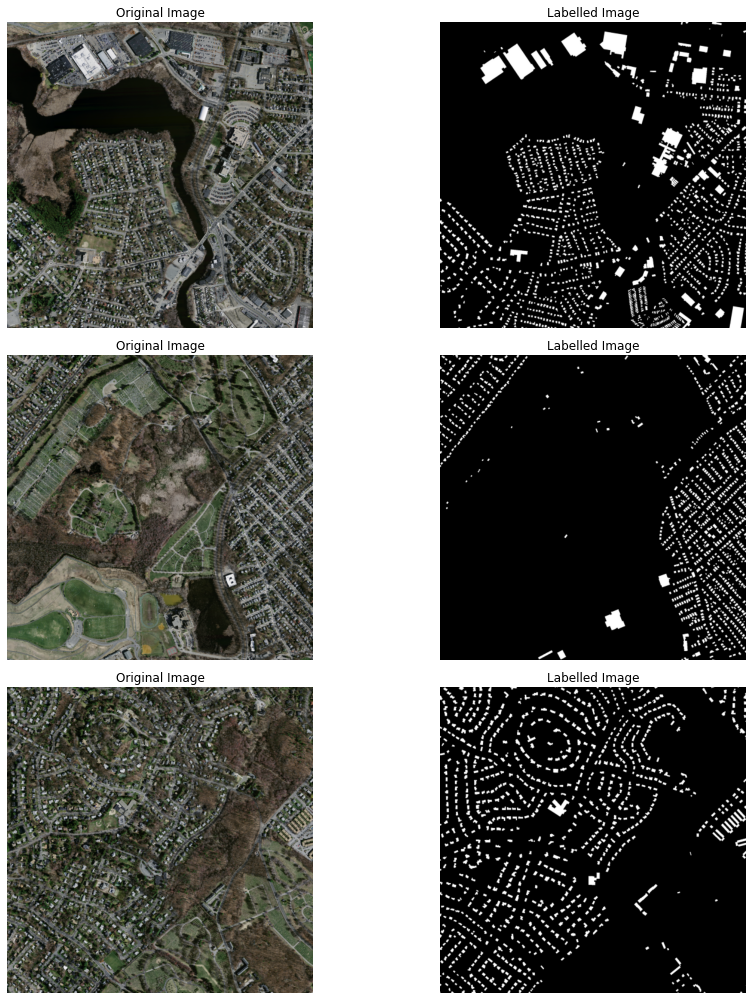

In [28]:
display_image(train_images[0:3],train_labels[0:3])

## DeepLab Model

In [ ]:
class DeepLab(object):
    